Saving Fit_or_not.csv to Fit_or_not.csv
Original Class Distribution:
 IsFit
0.0    101
1.0     37
Name: count, dtype: int64

Balanced Class Distribution:
 IsFit
1.0    37
0.0    37
Name: count, dtype: int64

✅ Accuracy: 0.9333333333333333

✅ Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.88      0.93         8
         1.0       0.88      1.00      0.93         7

    accuracy                           0.93        15
   macro avg       0.94      0.94      0.93        15
weighted avg       0.94      0.93      0.93        15



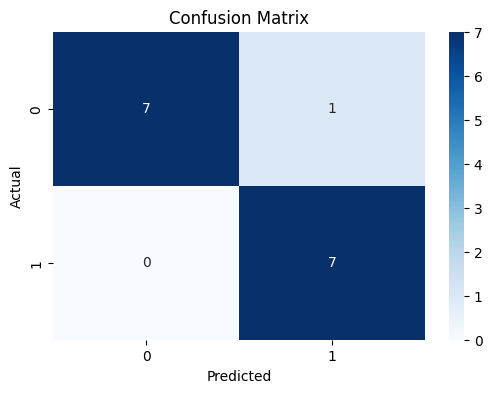


📥 Enter values for prediction:
Enter value for 'Age': 22
Enter value for 'Height_cm': 174
Enter value for 'Weight_kg': 91
Enter value for 'HeartRate_bpm': 49
Enter value for 'StepsPerDay': 500
Enter value for 'StressLevel': 4
Enter value for 'SleepHours': 5
Enter value for 'CaloriesIntake': 2000
Enter value for 'WaterIntake_Liters': 3
Enter value for 'ExerciseMinutes': 90
Enter value for 'Smoker': 0
Enter value for 'AlcoholUnitsPerWeek': 0

🔍 Prediction Result:
❌ Not Fit


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

uploaded = files.upload()
df = pd.read_csv("Fit_or_not.csv")

print("Original Class Distribution:\n", df['IsFit'].value_counts())

class_counts = df['IsFit'].value_counts()
minority_class = class_counts.idxmin()
majority_class = class_counts.idxmax()
minority_count = class_counts.min()

df_minority = df[df['IsFit'] == minority_class]
df_majority = df[df['IsFit'] == majority_class].sample(n=minority_count, random_state=42)

df_balanced = pd.concat([df_minority, df_majority], axis=0).sample(frac=1, random_state=42)

print("\nBalanced Class Distribution:\n", df_balanced['IsFit'].value_counts())

X = df_balanced.drop(columns=['IsFit'])
y = df_balanced['IsFit']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))

# 🔲 Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("\n📥 Enter values for prediction:")
input_features = []
for col in X.columns:
    val = float(input(f"Enter value for '{col}': "))
    input_features.append(val)
input_array = scaler.transform([input_features])
user_pred = model.predict(input_array)[0]
print("\n🔍 Prediction Result:")
print("✅ Fit" if user_pred == 1 else "❌ Not Fit")